In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [35]:
df=pd.read_csv("LoanData.csv")

In [36]:
type(df)


pandas.core.frame.DataFrame

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
df.shape

(614, 13)

In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [40]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
#dropping rows with missing values
df=df.dropna()

In [42]:
#To make prcoessing eaasier 
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\Aakriti\AppData\Local\Temp\ipykernel_16336\3389387029.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [44]:
df["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [46]:
print(type(df))  # This should print <class 'pandas.core.frame.DataFrame'>, not NoneType


<class 'pandas.core.frame.DataFrame'>


In [47]:
#So u need to replace 3+ with a better number so say, we keep it 4
df.replace({'Dependents': {'3+': 4}}, inplace=True)
#df=df.replace(to_replace='3+',value=4)

In [48]:
print(df['Dependents'])

1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 480, dtype: object


Data Visualisation

<Axes: xlabel='Education', ylabel='count'>

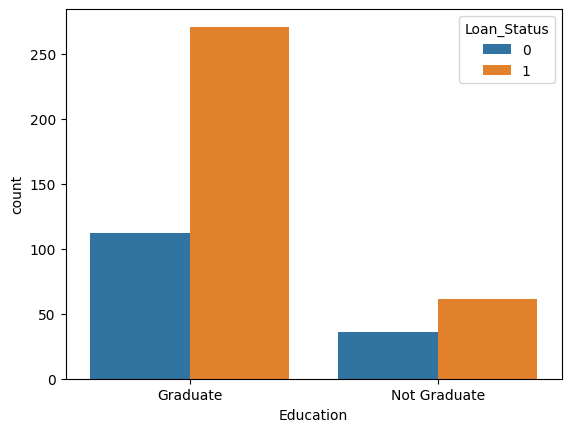

In [49]:
#relation with education
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

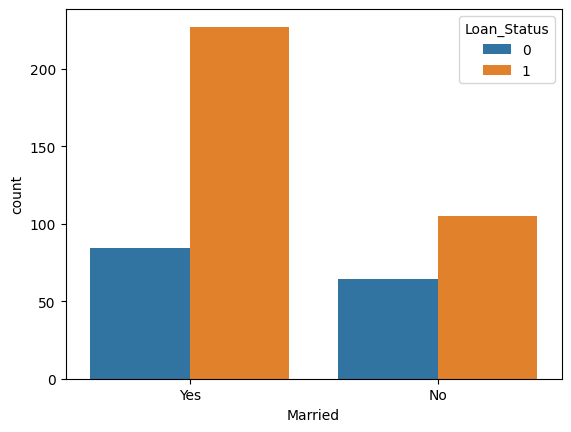

In [51]:
#relation with marital status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

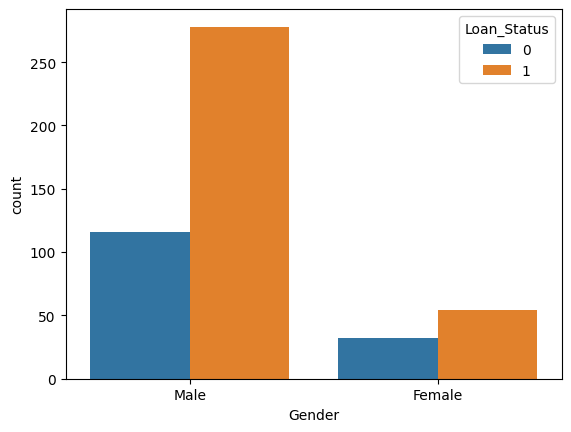

In [52]:
#relation with gender
sns.countplot(x='Gender',hue='Loan_Status',data=df)

In [56]:
#we convert all texts with numbers
df.replace({'No':0,'Yes':1},inplace=True)

C:\Users\Aakriti\AppData\Local\Temp\ipykernel_16336\2933743207.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'No':0,'Yes':1},inplace=True)


In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,1,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [60]:
df.replace({'Gender':{'Female':0,'Male':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Urban':2,'Semiurban':1}},inplace=True)

C:\Users\Aakriti\AppData\Local\Temp\ipykernel_16336\3331789550.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Female':0,'Male':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Urban':2,'Semiurban':1}},inplace=True)


In [61]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [62]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(432, 11)
(48, 11)
(480, 11)


Training the model using support vector machine model


In [68]:
#works well when a lot of parameters are there 
classifier=svm.SVC(kernel='linear')

In [70]:
#training the model, defines a hyperplane acc to the number of features
classifier.fit(X_train,Y_train).get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [75]:
#Model evaluation
xTrPred=classifier.predict(X_train)
acc=accuracy_score(xTrPred,Y_train)
print(acc)
#small data set thus, accuracy receied is less

0.7986111111111112


In [76]:
xTePred=classifier.predict(X_test)
acctest=accuracy_score(xTePred,Y_test)
print(acctest)

0.8333333333333334


In [84]:
# WRONG!!! input=X_test[1]
#The error KeyError: 1 occurs because you're trying to access X_test[1], but X_test is a DataFrame, and 1 is being interpreted as a column name, not an index.

#✅ Correcting the Issue
#You should use .iloc to select a row by index:
input=X_test.iloc[1]
#classifier.predict() expects a 2D array, so we wrap it in [ ].

xp=classifier.predict([input])
print(xp)
if(xp[0]==1):
    print("Loan is sanctioned")
else:
    print("Loan not sanctioned")

[1]
Loan is sanctioned


C:\Users\Aakriti\miniconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
